<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# 데이터프레임 변경 (4)

### [실습1]

1) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 1-1) pandas 라이브러리를 pd 별칭을 주어 불러오세요.
- 1-2) 다음 경로의 파일들을 불러와 **pop01, pop02, pop03** 데이터프레임을 만드세요.
    - 단, read_csv() 함수 사용시  index_col='year' 옵션을 지정하세요.
    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv'    
    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv'
    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h03.csv'
- 1-3) 세 개의 데이터프레임을 outer 방식으로 연결해 pop 데이터프레임을 만드세요.
- 1-4) pop 데이터프레임 인덱스를 초기화 하세요. 단 기존 인덱스 값을 버리지 마세요.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
path1 = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv'
path2 = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv'
path3 = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h03.csv'

pop01 = pd.read_csv(path1, index_col='year')
pop02 = pd.read_csv(path2, index_col='year')
pop03 = pd.read_csv(path3, index_col='year')

In [41]:
print(pop01.head(2))
print(pop02.head(2))
print(pop03.head(2))

      k_male  k_female
year                  
1981    4160      4191
1982    4160      4191
      f_male  f_female
year                  
1985       7         6
1986       7         5
      household  older_65
year                     
1981       1915       246
1982       2001       260


In [42]:
pop = pd.concat([pop01, pop02, pop03], axis=1, join='outer')
pop.head()

,k_male,k_female,f_male,f_female,household,older_65
year,,,,,,
1981,4160,4191,NaN,NaN,1915,246
1982,4160,4191,NaN,NaN,2001,260
1983,4160,4191,NaN,NaN,2116,260
1984,4160,4191,NaN,NaN,2246,275
1985,4160,4191,7.0,6.0,2338,211


In [43]:
pop.reset_index(drop=False, inplace=True)

2) pop 데이터프레임 상위 10개 행을 확인하세요.

In [44]:
pop.head(10)

,year,k_male,k_female,f_male,f_female,household,older_65
0,1981,4160,4191,NaN,NaN,1915,246
1,1982,4160,4191,NaN,NaN,2001,260
2,1983,4160,4191,NaN,NaN,2116,260
3,1984,4160,4191,NaN,NaN,2246,275
4,1985,4160,4191,7.0,6.0,2338,211
5,1986,4899,4888,7.0,5.0,2428,305
6,1987,5000,4979,6.0,5.0,2518,329
7,1988,5156,5120,5.0,5.0,2658,349
8,1989,5305,5261,6.0,5.0,2817,363
9,1990,5321,5282,5.0,4.0,2820,363


3) 결측치가 어느 정도 존재하는 지 확인하세요.

In [45]:
pop.isna().sum()

year         0
k_male       0
k_female     0
f_male       4
f_female     4
household    0
older_65     0
dtype: int64

4) 모든 결측치는 뒤에 오는 값으로 채우세요.

In [46]:
pop.fillna(method='bfill', inplace=True)

5) 결측치가 남아 있는지 확인하세요.

In [47]:
pop.isna().sum()

year         0
k_male       0
k_female     0
f_male       0
f_female     0
household    0
older_65     0
dtype: int64

### [실습2]

1) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 1-1) pandas 라이브러리를 pd 별칭을 주어 불러오세요.
- 1-2) 다음 경로의 파일들을 불러와 **pop01, pop02, pop03** 데이터프레임을 만드세요.
    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv'    
    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv'
    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h03.csv'
- 1-3) 세 개의 데이터프레임을 inner 방식으로 **조인(merge)** 해 pop 데이터프레임을 만드세요.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path1 = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv'
path2 = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv'
path3 = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h03.csv'

pop01 = pd.read_csv(path1)
pop02 = pd.read_csv(path2)
pop03 = pd.read_csv(path3)

In [49]:
pop = pd.merge(pop01, pop02, on='year', how='inner')

In [50]:
pop = pd.merge(pop, pop03, on='year', how='outer')

2) pop 데이터프레임 상위 10개 행을 확인하세요.

In [51]:
pop.head(10)

,year,k_male,k_female,f_male,f_female,household,older_65
0,1985,4160.0,4191.0,7.0,6.0,2338,211
1,1986,4899.0,4888.0,7.0,5.0,2428,305
2,1987,5000.0,4979.0,6.0,5.0,2518,329
3,1988,5156.0,5120.0,5.0,5.0,2658,349
4,1989,5305.0,5261.0,6.0,5.0,2817,363
5,1990,5321.0,5282.0,5.0,4.0,2820,363
6,1991,5468.0,5405.0,18.0,14.0,3330,424
7,1992,5500.0,5435.0,19.0,16.0,3383,434
8,1993,5478.0,5412.0,19.0,17.0,3431,445
9,1994,5409.0,5351.0,21.0,19.0,3456,454


3) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 3-1) 다음 공식에 따라 pop 데이터프레임에 k_total, f_total, male, female, total 열을 추가하세요.
    - k_total = k_male + k_female
    - f_total = f_male + f_female
    - male = k_male + f_male
    - female = k_female + f_female
    - total = k_total + f_total
- 3-2) year, total, male, female 열만 추출해 pop_sum 데이터프레임을 선언하세요.
- 3-3) pop_sum 데이터프레임 상위 10개 행을 조회하세요.

In [52]:
pop['k_total'] = pop['k_male'] + pop['k_female']
pop['f_total'] = pop['f_male'] + pop['f_female']
pop['male'] = pop['k_male'] + pop['f_male']
pop['female'] = pop['k_female'] + pop['f_female']
pop['total'] = pop['k_total'] + pop['f_total']

In [53]:
pop_sum = pop[['year', 'total', 'male', 'female']]
pop_sum.head(10)

,year,total,male,female
0,1985,8364.0,4167.0,4197.0
1,1986,9799.0,4906.0,4893.0
2,1987,9990.0,5006.0,4984.0
3,1988,10286.0,5161.0,5125.0
4,1989,10577.0,5311.0,5266.0
5,1990,10612.0,5326.0,5286.0
6,1991,10905.0,5486.0,5419.0
7,1992,10970.0,5519.0,5451.0
8,1993,10926.0,5497.0,5429.0
9,1994,10800.0,5430.0,5370.0


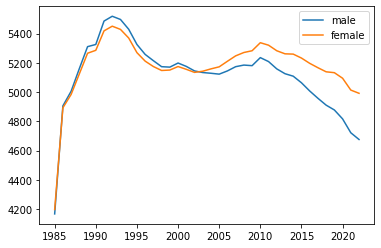

In [54]:
plt.plot(pop['year'], pop_sum[['male', 'female']])
plt.legend(['male', 'female'])
plt.show()